In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("risk.csv")

In [7]:
print(df.head())

   Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4  


In [9]:
# Check for null values in the DataFrame
null_counts = df.isnull().sum()
print("\nNull value counts for each column:\n", null_counts)


Null value counts for each column:
 Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


In [11]:
# Fill missing numerical values with the mean
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical values with the mode
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])


# Verify that there are no more missing values
print("\nNull value counts after handling missing values:\n", df.isnull().sum())


Null value counts after handling missing values:
 Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


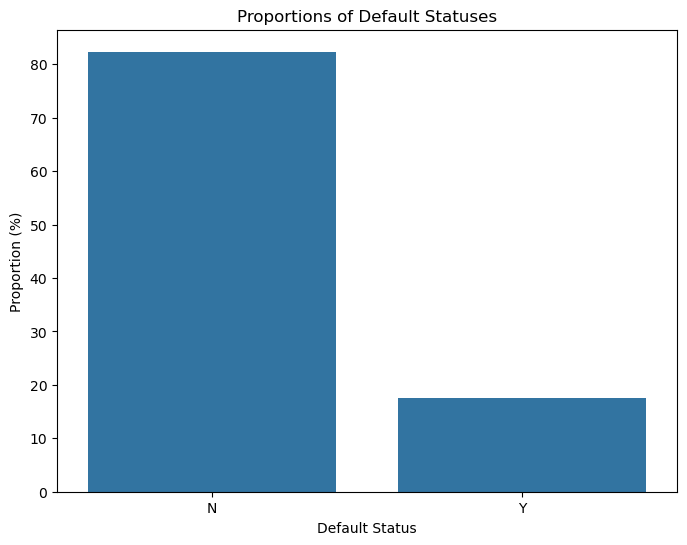

In [13]:
# Calculate the proportions of default statuses
default_proportions = df['Default'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=default_proportions.index, y=default_proportions.values)
plt.xlabel('Default Status')
plt.ylabel('Proportion (%)')
plt.title('Proportions of Default Statuses')
plt.show()

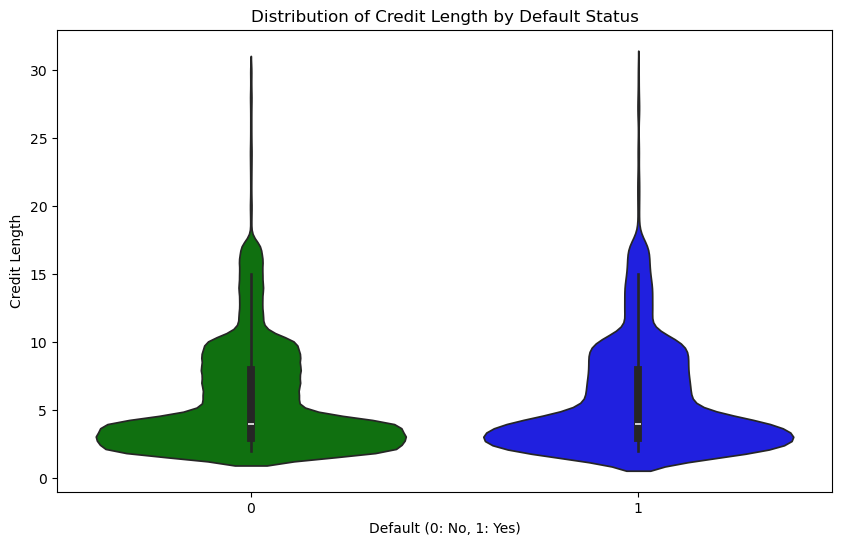

In [55]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Default', y='Cred_length', data=df, palette=["green", "blue"])
plt.title('Distribution of Credit Length by Default Status')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Credit Length')
plt.show()


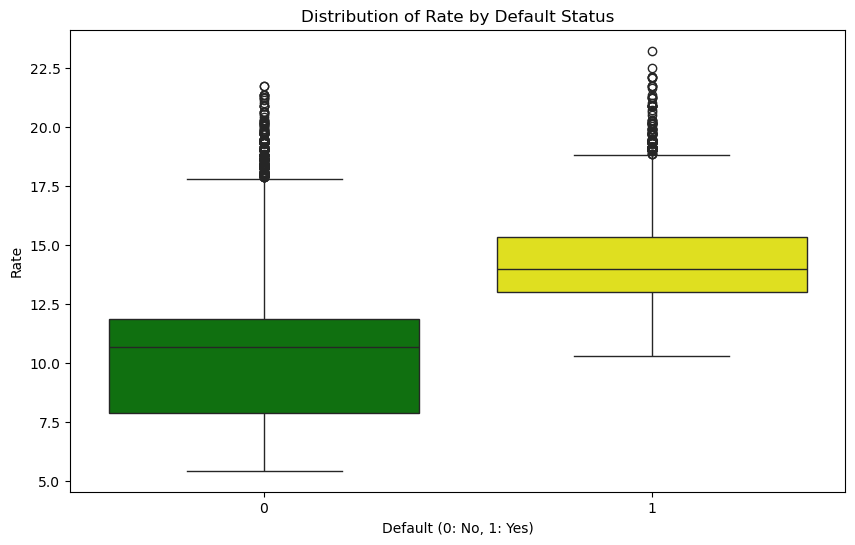

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Rate', data=df , palette=["green", "yellow"])
plt.title('Distribution of Rate by Default Status')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Rate')
plt.show()

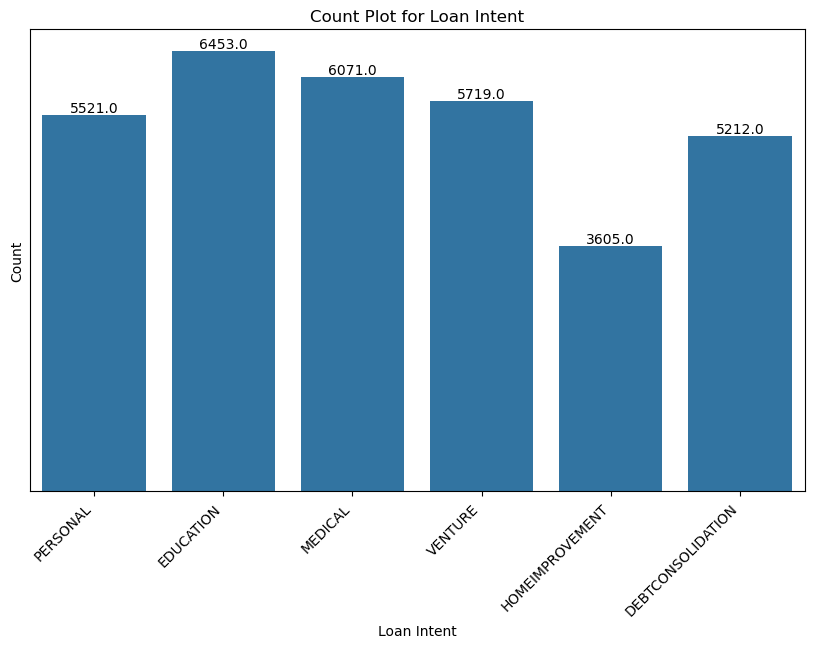

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Intent', data=df)
plt.title('Count Plot for Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Remove y-ticks
plt.yticks([])

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

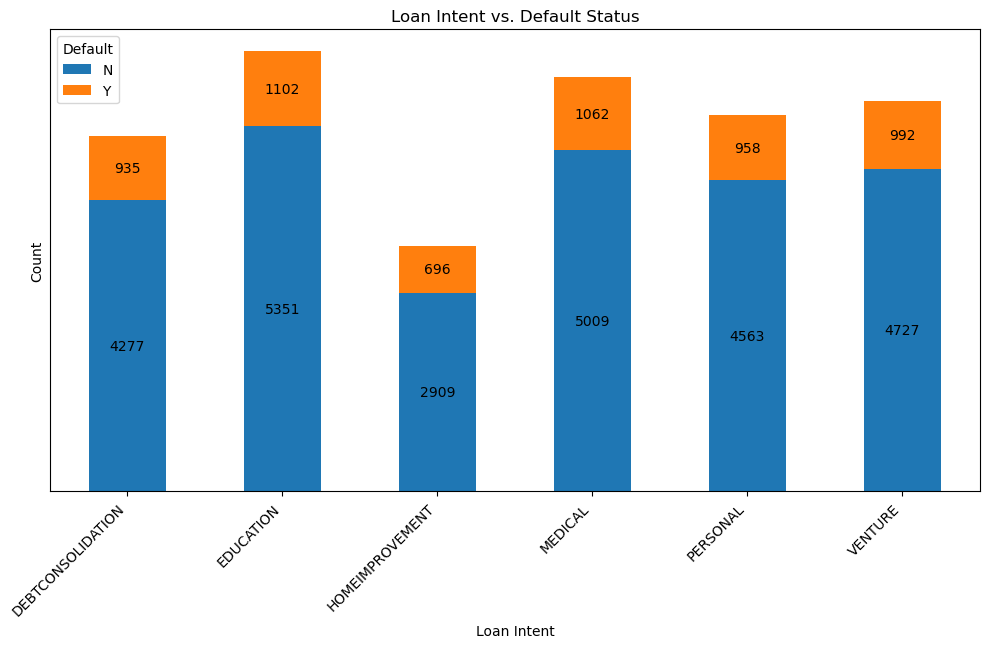

In [21]:
# Group data by 'Intent' and 'Default' and calculate the counts
intent_default_counts = df.groupby(['Intent', 'Default']).size().unstack(fill_value=0)

# Create the stacked bar chart
ax = intent_default_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Loan Intent vs. Default Status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks
plt.yticks([])

# Add value labels on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

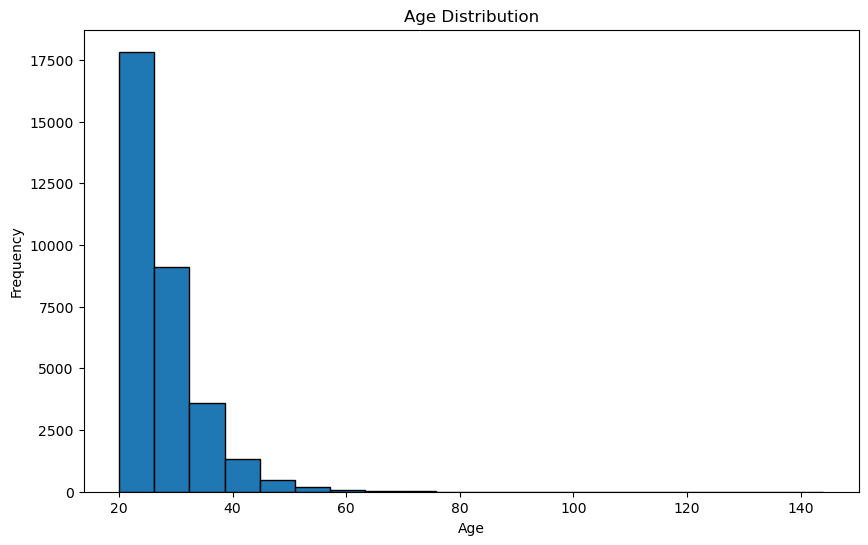

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns and encode categorical variables
for column in df.columns:
  if not pd.api.types.is_numeric_dtype(df[column]):
    df[column] = le.fit_transform(df[column])

print("\nDataFrame after encoding categorical variables:\n", df.head())


DataFrame after encoding categorical variables:
    Id  Age  Income  Home  Emp_length  Intent  Amount   Rate  Status  \
0   0   22   59000     3       123.0       4   35000  16.02       1   
1   1   21    9600     2         5.0       1    1000  11.14       0   
2   2   25    9600     0         1.0       3    5500  12.87       1   
3   3   23   65500     3         4.0       3   35000  15.23       1   
4   4   24   54400     3         8.0       3   35000  14.27       1   

   Percent_income  Default  Cred_length  
0            0.59        1            3  
1            0.10        0            2  
2            0.57        0            3  
3            0.53        0            2  
4            0.55        1            4  


In [35]:
# Drop specified columns
X = df.drop(['Id', 'Status', 'Default'], axis=1)

# Set 'Default' column as the target variable
y = df['Default']

In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Reshape the target variables if necessary
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

X_train shape: (26064, 9)
X_test shape: (6517, 9)
y_train shape: (26064,)
y_test shape: (6517,)


In [39]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [41]:
# Now apply SMOTE to the imputed data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

X_train_resampled shape: (42936, 9)
y_train_resampled shape: (42936,)


In [57]:
# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the imputed test set
y_pred = logreg_model.predict(X_test)  # Use X_test_imputed

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      5368
           1       0.38      0.79      0.52      1149

    accuracy                           0.74      6517
   macro avg       0.66      0.76      0.67      6517
weighted avg       0.84      0.74      0.77      6517

[[3904 1464]
 [ 242  907]]


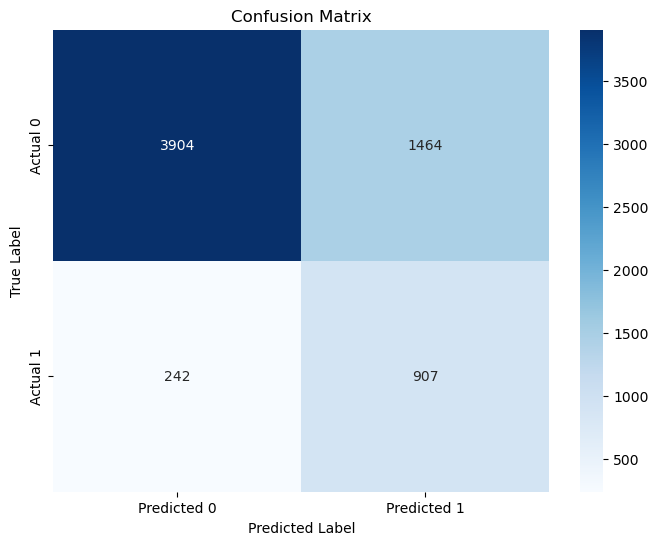

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This confusion matrix provides an overview of the performance of your logistic regression model in classifying two classes: "0" (non-default) and "1" (default). Here’s a breakdown of each component in the matrix:

True Positives (TP = 907): The model correctly predicted 907 instances as "1" (default) when they actually belong to the "default" class.

True Negatives (TN = 3904): The model correctly predicted 3904 instances as "0" (non-default) when they are truly in the "non-default" class.

False Positives (FP = 1464): The model incorrectly predicted 1464 instances as "1" (default) when they are actually "non-default." This is also known as a Type I error.

False Negatives (FN = 242): The model incorrectly predicted 242 instances as "0" (non-default) when they are actually "default." This is also known as a Type II error.

Key Performance Insights
Precision for Default (Class 1): Out of all the instances predicted as "default" (907 TP + 1464 FP), only 908 were correct. A lower precision would indicate that the model produces more false positives.

Recall for Default (Class 1): Out of all the actual "default" cases (907 TP + 242 FN), the model correctly identified 908. A lower recall here would mean the model is missing more actual default cases.

Overall Accuracy: The sum of true positives and true negatives (3904 + 907) over all instances gives a measure of accuracy. However, given the imbalance in classes, it’s better to focus on recall and F1-score for the default class to understand how well the model performs in identifying defaulters.

Next Steps for Improvement
If you want to improve the model’s ability to correctly predict defaults (reduce FN and FP), you might consider:

Hyperparameter tuning for the logistic regression model.


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

# Train a model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.8448897977233598
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5368
           1       0.50      0.78      0.61      1149

    accuracy                           0.82      6517
   macro avg       0.72      0.81      0.75      6517
weighted avg       0.87      0.82      0.84      6517

[[4460  908]
 [ 251  898]]


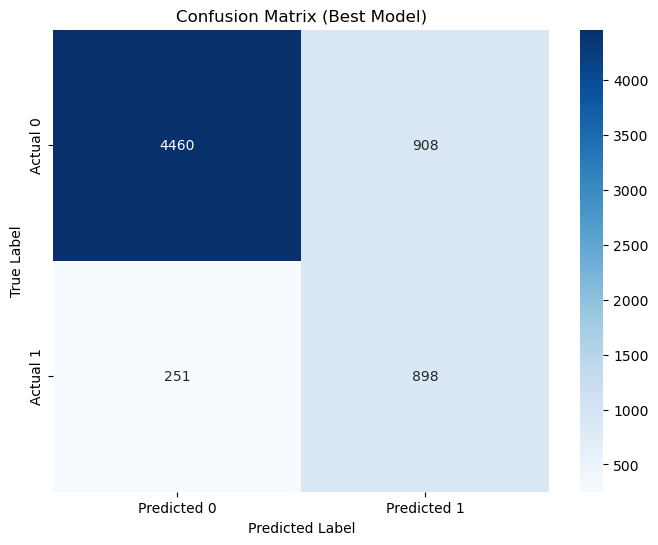

In [72]:
# Plot the confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The confusion matrix you provided represents the model's performance after hyperparameter tuning. Here’s an analysis of the results:

True Negatives (TN = 4460): The model correctly classified 4460 instances as "non-default."

False Positives (FP = 908): The model incorrectly classified 908 instances as "default" when they are actually "non-default."

False Negatives (FN = 251): The model incorrectly classified 251 instances as "non-default" when they are actually "default."

True Positives (TP = 907): The model correctly classified 907 instances as "default."

Key Performance Improvements
Compared to the previous model:

True Negatives (TN) increased from 3898 to 4460, showing an improvement in correctly identifying non-default cases.
False Positives (FP) decreased from 1470 to 908, reducing the number of non-default cases misclassified as default.
True Positives (TP) stayed nearly the same (908 vs. 907), indicating that the model’s ability to detect actual default cases remained consistent.
False Negatives (FN) increased from 241 to 251.
Insights
The hyperparameter tuning process successfully reduced the number of false positives without significantly affecting the model's recall for the default class. This suggests that the model has improved in distinguishing between the two classes, especially for the non-default cases.

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8674718838354482
Recall: 0.8221574344023324
F1-score: 0.8361314128544185


Precision (0.867): This indicates that when the model predicts "default," it is correct 86.7% of the time. A high precision value suggests that the model has reduced the number of false positives (non-defaults misclassified as defaults), which aligns with the improvement shown in the confusion matrix.

Recall (0.822): This measures the model's ability to identify actual defaults, with a value of 82.2%. While this is slightly lower than the precision, it shows that the model is effective at catching most true default cases, although it may still miss some.

F1-Score (0.836): The F1-score is the harmonic mean of precision and recall, providing a balance between these two metrics. An F1-score of 0.837 indicates that the model has a strong balance between precision and recall, making it suitable for handling imbalanced data in this context.

Overall Performance
The high precision and reasonably strong recall suggest that the model is now both accurate and capable of identifying defaults effectively, with fewer false alarms (non-defaults incorrectly classified as defaults). This balance makes it well-suited for applications where it’s important to avoid misclassifying non-defaulters, while still capturing a substantial portion of defaulters.

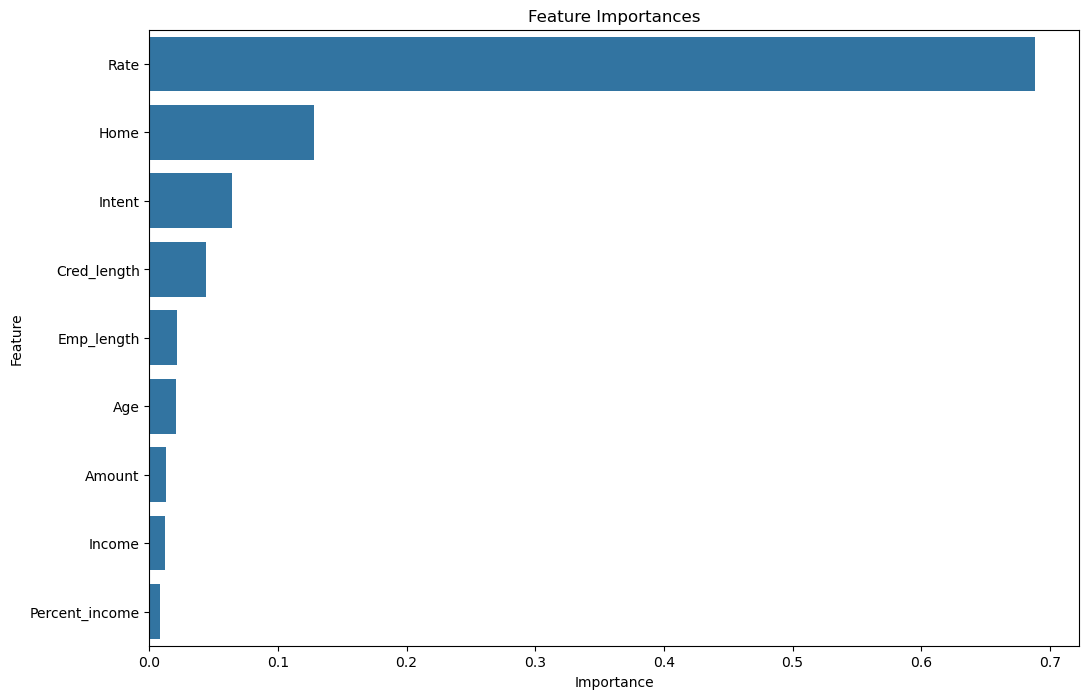

In [77]:
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [80]:
import joblib

joblib.dump(best_rf_model, 'rf_risk.pkl')
print("Model saved successfully!")


Model saved successfully!
